In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, experimental, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
dataset_path = "F:/images"

# ImageDataGenerator를 사용하여 이미지 전처리 및 데이터 증강 설정
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)  # 검증 데이터셋 분할 비율

# ImageDataGenerator를 사용하여 폴더에서 이미지를 로드하고 데이터셋 생성
image_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=64,
    class_mode='categorical',
    classes=["elliptical", "spiral", "uncertain"],
    subset='training')  # 훈련 데이터셋 설정

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=64,
    class_mode='categorical',
    classes=["elliptical", "spiral", "uncertain"],
    subset='validation')  # 검증 데이터셋 설정

Found 34585 images belonging to 3 classes.
Found 8645 images belonging to 3 classes.


In [3]:
model = Sequential([
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(64,64,3)),
    MaxPooling2D(2,2),
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(2,2),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation="relu"),
    Dense(3, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 256)        0

In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
history = model.fit(image_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10
541/541 [==============================] - 1636s 3s/step - loss: 0.7965 - accuracy: 0.6527 - val_loss: 0.6715 - val_accuracy: 0.6967
Epoch 2/10
541/541 [==============================] - 696s 1s/step - loss: 0.7236 - accuracy: 0.6879 - val_loss: 0.6243 - val_accuracy: 0.7232
Epoch 3/10
541/541 [==============================] - 693s 1s/step - loss: 0.7085 - accuracy: 0.6952 - val_loss: 0.6344 - val_accuracy: 0.7164
Epoch 4/10
541/541 [==============================] - 667s 1s/step - loss: 0.7011 - accuracy: 0.6981 - val_loss: 0.6399 - val_accuracy: 0.7144
Epoch 5/10
541/541 [==============================] - 672s 1s/step - loss: 0.6981 - accuracy: 0.6983 - val_loss: 0.5953 - val_accuracy: 0.7403
Epoch 6/10
541/541 [==============================] - 619s 1s/step - loss: 0.6918 - accuracy: 0.7005 - val_loss: 0.6021 - val_accuracy: 0.7392
Epoch 7/10
541/541 [==============================] - 653s 1s/step - loss: 0.6850 - accuracy: 0.7043 - val_loss: 0.6071 - val_accuracy: 0.729

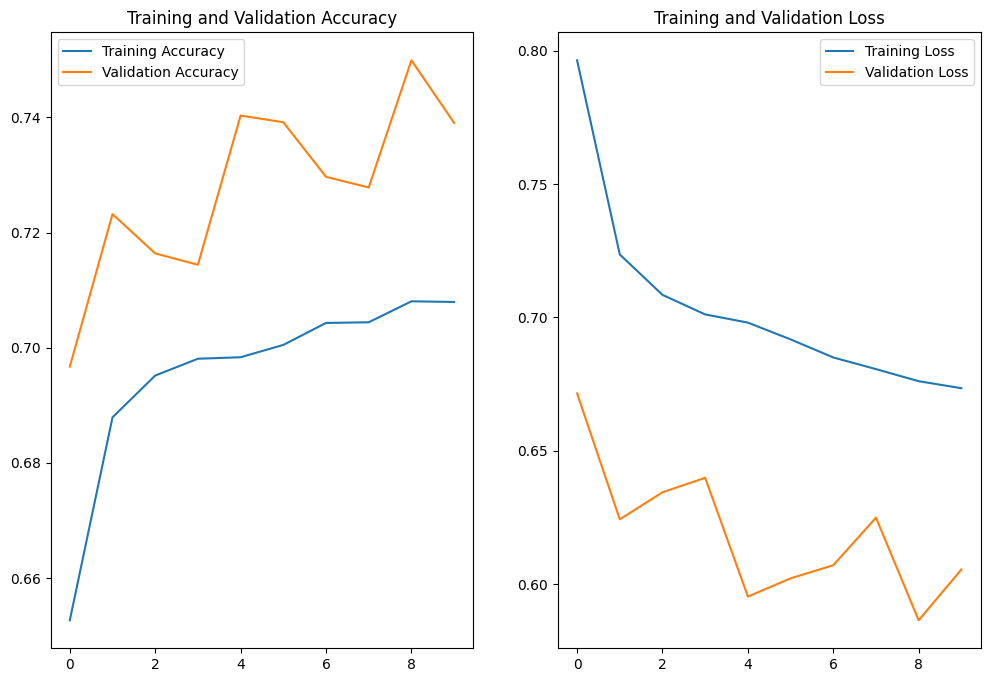

In [7]:
# assess model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [10]:
image_path = "C:/Users/user/python_machine_learning/2023_창의학술제/sample_image.jpg"

class_names = ["elliptical", "spiral", "uncertain"]

img = image.load_img(image_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(f"This image belongs to category {class_names[np.argmax(score)]} with {np.max(score)} value")

1/1 [==============================] - 0s 128ms/step
This image belongs to category uncertain with 0.5761168599128723 value
